# 逻辑回归

Data: <br/>
features--two exams's grades  <br/>
response--whether been admitted

In [1]:
#输出多个output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 数据预处理

In [3]:
data = pd.read_table("data.txt", header=None, sep=",", names=["Exam1","Exam2","Admit"])
data.head()

,Exam1,Exam2,Admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exam1   100 non-null    float64
 1   Exam2   100 non-null    float64
 2   Admit   100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


,Exam1,Exam2,Admit
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Note: two features have same scale, no need to feature scaling

Text(0.5, 0, 'Exam 1 Score')

Text(0, 0.5, 'Exam 2 Score')

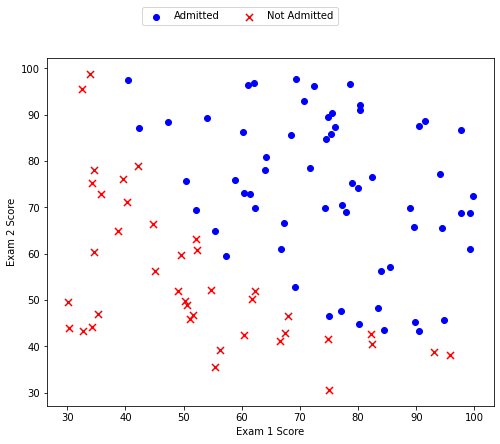

In [5]:
positive = data[data.Admit.isin([1])]  #在data.frame中选出Admit是1的那些数据
negative = data[data.Admit.isin([0])]  
fig, ax = plt.subplots(figsize=(8,8)) #设置图像大小
ax.scatter(positive['Exam1'], positive['Exam2'], c='b', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
#设置图例
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height* 0.8])
ax.legend(loc='center left', bbox_to_anchor=(0.2, 1.12),ncol=3)
# 设置横纵坐标名
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

我们发现线性的boundary可以较好的分开两类。因此，我们选择线性的 yita = theta0+theta1*X1+theta2*X2

### Sigmoid function

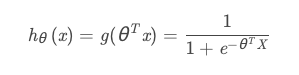

In [6]:
def sigmoid(z):
    h = 1 / (1+np.exp(-z))
    return h

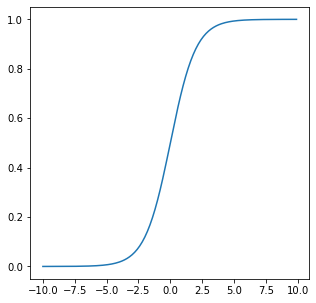

In [7]:
#check the function
x1 = np.arange(-10,10,0.1)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x1,sigmoid(x1))

### 变量初始化

In [8]:
data.insert(0,"X0",1)

In [9]:
#set X, y and theta
X = data.iloc[:, :-1]
y = data.iloc[:, -1] 
theta = np.zeros(X.shape[1])#theta也是array格式

In [10]:
# transform X and y into array
X = np.array(X.values)
y = np.array(y.values)

In [11]:
X.shape, y.shape, theta.shape

((100, 3), (100,), (3,))

选择这样的数据类型，是因为optimization algorithm的要求

### Cost function

In [12]:
def cost(theta, X, y):
    first = (-y) * np.log(sigmoid(np.dot(X,theta)))#   * 表示array对应元素相乘
    second = (1 - y)*np.log(1 - sigmoid(np.dot(X,theta)))
    return np.mean(first - second)

In [13]:
cost(theta, X, y)

0.6931471805599453

### 计算 Batch Gradient

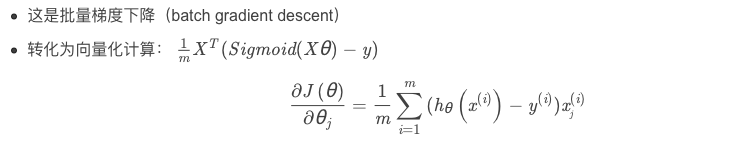

In [14]:
def gradient(theta,X,y):
    grad = (X.T @ (sigmoid(np.dot(X,theta))-y))/len(X)#   @ 表示array的矩阵乘法和np.dot()是一样的
    return grad

In [15]:
gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

### Optimization Algorithm

In [17]:
import scipy.optimize as opt

首先，采用fimin_tnc()函数，这个函数使用的是TNC(截断牛顿法)做最优化<br/> 
在使用这个函数时我们会传入Cost function作为参数，注意在Cost函数定义时要将变量theta放在第一个

In [18]:
result = opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(X,y))
result

(array([-25.16131858,   0.20623159,   0.20147149]), 36, 0)

还可以采用minimize()函数<br/>
在函数的参数method中可以选择不同的方法如(TNC,BFGS,L-BFGS-B等等）

In [23]:
res = opt.minimize(fun=cost,x0=theta,jac=gradient,args=(X,y),method="TNC")
res

     fun: 0.20349770158947472
     jac: array([9.20079808e-09, 1.03208425e-07, 4.84281762e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131858,   0.20623159,   0.20147149])

### Judge prediction accuracy

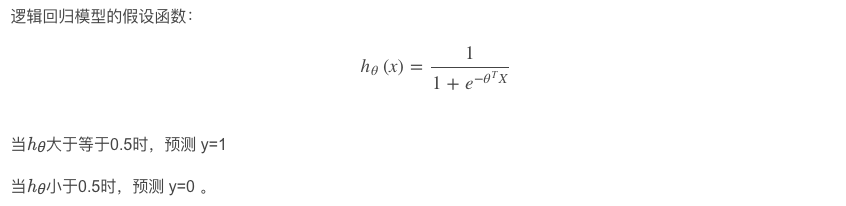

In [33]:
def predict(theta, X):
    P = sigmoid(np.dot(X,theta))
    return [1 if x>=0.5 else 0 for x in P] #return a list

In [34]:
final_theta = res["x"]
Pred = predict(final_theta,X)
correct = [1 if a==b else 0 for (a,b) in zip(Pred,y)] #zip函数将两个列表打包成元组
accuracy = sum(correct)/len(correct)
accuracy

0.89

### Decision boundary

The boundary is theta0+theta1X1+theta2X2 

In [35]:
xx1 = np.arange(30,100,0.1)
theta0 = final_theta[0]
theta1 = final_theta[1]
theta2 = final_theta[2]
xx2 = -(theta1/theta2)*xx1 - theta0/theta2

Text(0.5, 0, 'Exam 1 Score')

Text(0, 0.5, 'Exam 2 Score')

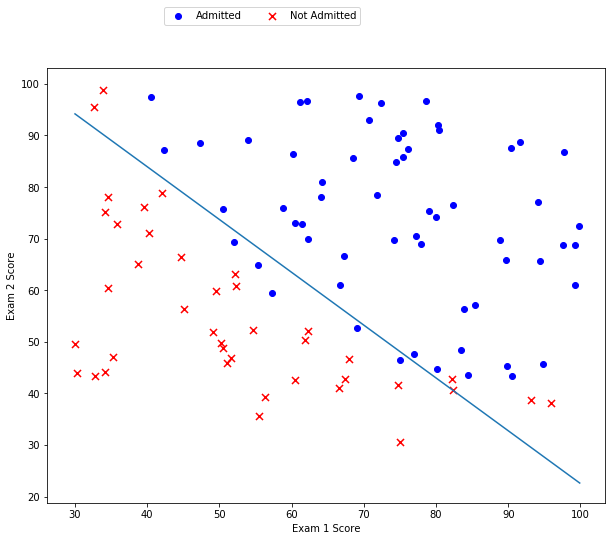

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(positive['Exam1'], positive['Exam2'], c='b', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height* 0.8])
ax.legend(loc='center left', bbox_to_anchor=(0.2, 1.12),ncol=3)
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

ax.plot(xx1,xx2)

Look good!